# SVM Regression on Hotel Rental Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import svr

from sklearn.svm import SVR

In [7]:
data = pd.read_excel('data/house_rental_data.xlsx')
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [11]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

array([[<Axes: title={'center': 'Sqft'}>,
        <Axes: title={'center': 'Floor'}>,
        <Axes: title={'center': 'TotalFloor'}>],
       [<Axes: title={'center': 'Bedroom'}>,
        <Axes: title={'center': 'Living.Room'}>,
        <Axes: title={'center': 'Bathroom'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

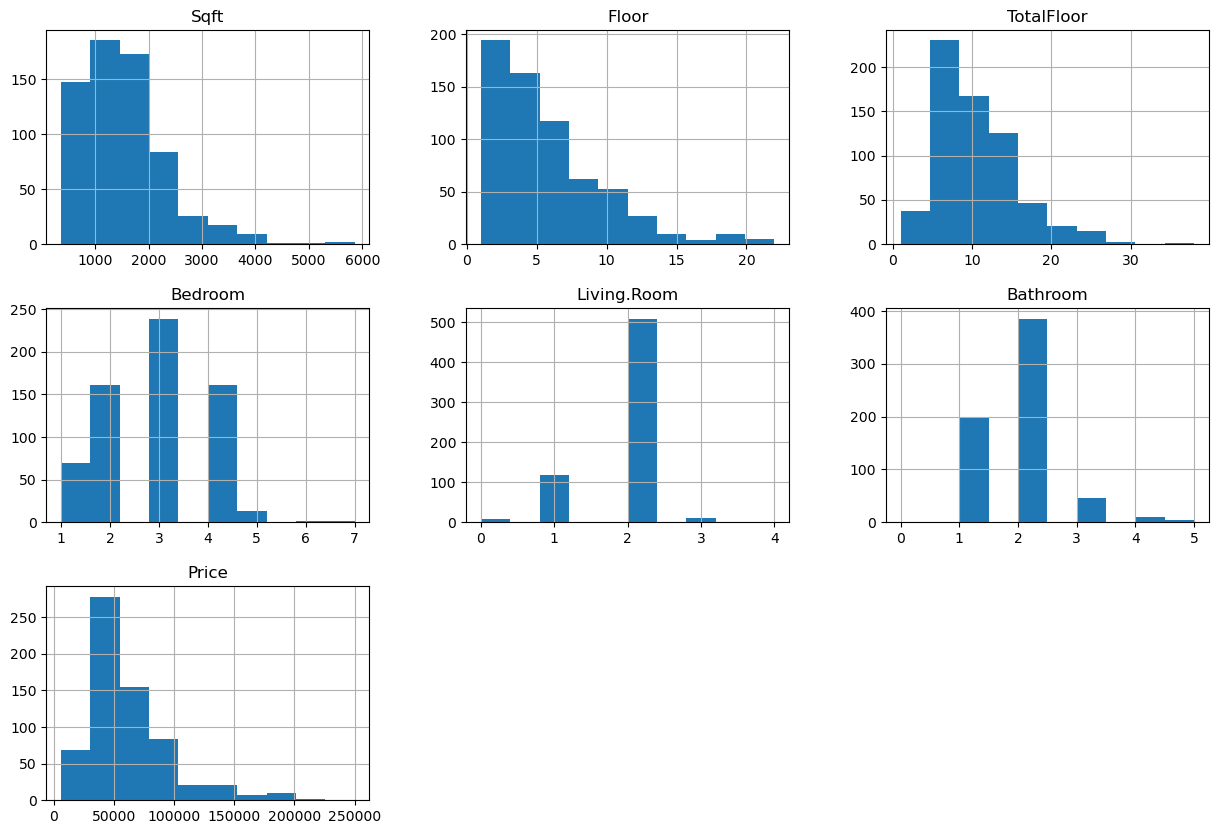

In [20]:
data.hist(figsize=(15,10))

In [13]:
# spliting train and Test dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=2)

In [14]:
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (483, 6)

Training data-y- Shape:	 (483, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (162, 6)

Testing data(y-Outcome) Shape:	 (162, 1)


## Build the SVR regression model

#### SVR with Non linear kernal - rbf

In [16]:
from sklearn.metrics import mean_squared_error,r2_score
support_reg=SVR()

print('Hyperparameter:\n',support_reg.get_params())
print()
support_reg.fit(xtrain,ytrain)
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print()
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Predicted price:
 [49972.41312327 50048.94599477 49969.60294613 49980.65587919
 50145.07655629 49977.27535075 50109.73592186 49973.28259023
 50070.33597535 50129.8020352  50116.1937069  50063.61207855
 50025.15332009 50091.81297198 50080.48830009 50014.8719954
 50118.02719679 50077.13984195 49996.12336323 50103.1132917
 50127.23340386 50048.94685316 50012.87960694 50073.75889289
 49969.23252582 50027.27329358 49964.5013522  50040.18110392
 50055.97650454 50120.95621414 50052.46193456 50139.36184503
 50035.83995461 50088.24010271 50012.48231201 50109.73608008
 49960.39675307 49979.85057443 50146.23359164 50043.67732846
 50114.94538833 49962.25142583 50142.58500816 50070.7659648
 49969.23032586 50038.00150691 49960.720551   49962.25142059
 50091.81045133 50063.41847435 49995.77706549 49986.69525155

C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### SVR with Non linear kernal - linear

In [17]:
support_reg=SVR(kernel='linear')

print('Hyperparameter:\n',support_reg.get_params())
print()
support_reg.fit(xtrain,ytrain)
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print()
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Predicted price:
 [ 31074.7906766   58106.82639275  29796.46677509  37583.81683906
  98876.78071324  34353.03269144  80021.51033288  33765.63264222
  64024.30317003  86970.08192291  79691.29257831 209188.26136132
  51752.49806107  74951.49746401  68971.8133877   48387.12083982
  82751.56849561  65984.45354838  41951.66249484  75185.39327131
 129089.23267677  58954.29030111  48102.42547848  66513.30312197
  30776.66602821  55965.45292423  25749.18120504  55993.32368711
  59947.71331138  81077.76567744  59341.81047257 119034.69510382
  57424.01489093  69220.36647783  47758.42872404  78276.44585745
  19530.88311088  37079.53797839 102143.80500938  56879.20374592
  79238.51124482  23790.89413468 116054.43035154  64667.27714442
  29906.93106681  55520.46888705  21534.99506059  22619.50693848
  7083

C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### SVR with Non linear kernal - sigmoid


In [18]:
support_reg=SVR(kernel='sigmoid')

print('Hyperparameter:\n',support_reg.get_params())
print()
support_reg.fit(xtrain,ytrain)
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print()
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Predicted price:
 [49993.65964152 50001.40958352 49991.69966572 49997.4968671
 49982.16038801 49996.17882388 49993.62678585 49994.17740322
 49999.45252671 49988.94213891 49992.3190865  49948.61800456
 50002.45993432 49996.66281295 49998.23735497 50002.40526558
 49991.91608165 49998.65960018 50001.00767336 49994.84223488
 49967.54220846 50001.4088792  50002.3459332  49999.0615685
 49991.40084909 50002.42230769 49986.33639475 50001.95502278
 50000.85962574 49991.25112387 50001.1466226  49972.01090282
 50002.15823799 49997.19026357 50002.3330276  49993.62821935
 49976.40126921 49997.2085122  49980.83939242 50001.75811856
 49992.58385781 49982.34049716 49973.71466737 49999.40428355
 49991.40083708 50002.06514404 49977.84696421 49982.34038843
 49996.66747732 50000.17315188 50000.9605524  49999.260

C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
